# **Identifying key modalities sensory in Hebbian-based network**

### **Install Library**

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator

## **Tutortial How To USE THIS!**

### **Load Data**

In [4]:
fullstate = np.load("data/HEBB-FULL-STATE_seed-0.npz")
# fullstate = torch.load("data/HEBB-FULL-STATE_seed-4.pt" , weights_only=True)

In [5]:
print("Example Dimension of data : " , fullstate["state"].shape)
state = fullstate["state"]
print("Example Dimension of state : " , state.shape)
action = fullstate["action"]
print("Example Dimension of action : " , action.shape)

action_lowpass = fullstate["action_lowpass"]

Example Dimension of data :  (500, 1024, 64)
Example Dimension of state :  (500, 1024, 64)
Example Dimension of action :  (500, 1024, 19)


### **Joint Trajectory**

In [220]:
def plot_state_action_trajectory(states , actions , num_steps):
    if len(states) != len(actions):
        print("Warning: Length of states and actions do not match. Plotting might be inconsistent.")
        return
        # We'll proceed with the shorter length to avoid errors
    print(state.shape)
    if num_steps > state.shape[0] or num_steps > action.shape[0] :
        print("Warning: num step is higher that valid step.")
        num_steps = state.shape[0]

    # The 'x' values will be the step numbers (0, 1, 2, ..., num_steps-1)
    steps = np.arange(num_steps)
    states = states[:num_steps]
    actions = actions[:num_steps]    
    # Create the plot
    plt.figure(figsize=(20, 4)) # Optional: set a larger figure size for clarity
    # Plot the state trajectory
    plt.plot(steps, states, color='blue', linestyle='-', marker='o', markersize=1 , label='state')
    # Plot the action trajectory
    plt.plot(steps, actions, color='red', linestyle='--', marker='x', markersize=1 , label='action')
    # Add labels and title
    plt.xlabel("Step Number")
    plt.ylabel("Value")
    plt.title("State and Action Trajectory Over Steps")
    # Add a legend to differentiate state and action lines
    plt.legend()

    # Add a grid for better readability
    plt.grid(True, linestyle=':', alpha=0.7)
    # Optional: Adjust y-axis limits if values are very different
    # plt.ylim(min(states.min(), actions.min()) * 0.9, max(states.max(), actions.max()) * 1.1)

    # Show the plot
    plt.show()

In [221]:
def plot_compare_trajectory(action1, action2, num_steps=500):
    # Create the plot
    action1 = np.asarray(action1)
    action2 = np.asarray(action2)
    if len(action1) != len(action2):
        print("Warning: Length of states and actions do not match. Plotting might be inconsistent.")
        # We'll proceed with the shorter length to avoid errors
        action1 = action1[:num_steps]
        action2 = action2[:num_steps]
    else:
        num_steps = len(action1)
    # The 'x' values will be the step numbers (0, 1, 2, ..., num_steps-1)
    steps = np.arange(num_steps)
    # Create the plot
    plt.figure(figsize=(20, 4)) # Optional: set a larger figure size for clarity
    # Plot the state trajectory
    plt.plot(steps, action1, color='blue', linestyle='-', marker='o', markersize=1 , label='action1')
    # Plot the action trajectory
    plt.plot(steps, action2, color='red', linestyle='--', marker='x', markersize=1 , label='action2')
    # Add labels and title
    plt.xlabel("Step Number")
    plt.ylabel("Value")
    plt.title("action1 and action2 Trajectory Over Steps")
    # Add a legend to differentiate state and action lines
    plt.legend()

    # Add a grid for better readability
    plt.grid(True, linestyle=':', alpha=0.7)
    # Optional: Adjust y-axis limits if values are very different
    # plt.ylim(min(states.min(), actions.min()) * 0.9, max(states.max(), actions.max()) * 1.1)

    # Show the plot
    plt.show()

In [8]:
def plot_state_action_all_joint_trajectory(states, actions, num_steps):
    if len(states) != len(actions):
        print("Warning: Length of states and actions do not match. Plotting might be inconsistent.")
        states = states[:num_steps]
        actions = actions[:num_steps]
    else:
        num_steps = len(states)

    steps = np.arange(num_steps)
    num_joints = actions.shape[1]
    plt.figure(figsize=(20, 2 * num_joints))

    for i in range(num_joints):
        plt.subplot(num_joints, 1, i + 1)
        plt.plot(steps, states[:, i], color='blue', linestyle='-', marker='o', markersize=1, label='state')
        plt.plot(steps, actions[:, i], color='red', linestyle='--', marker='x', markersize=1, label='action')
        plt.ylabel(f"Joint {i}")
        if i == num_joints - 1:
            plt.xlabel("Step Number")
        plt.title(f"State vs Action - Joint {i}")
        plt.legend()
        plt.grid(True, linestyle=':', alpha=0.7)

    plt.tight_layout()
    plt.show()

(500, 1024, 64)


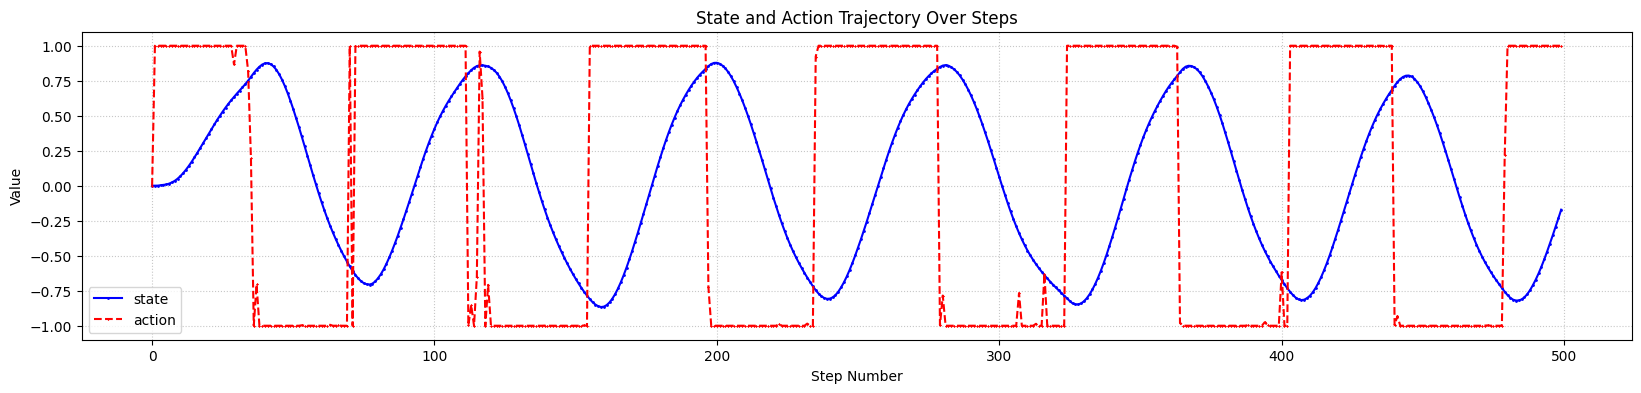

In [9]:
plot_state_action_trajectory(states=state[:,0,0] , actions=action[:,0,0] , num_steps=500)

#### **Compare pure policy action**

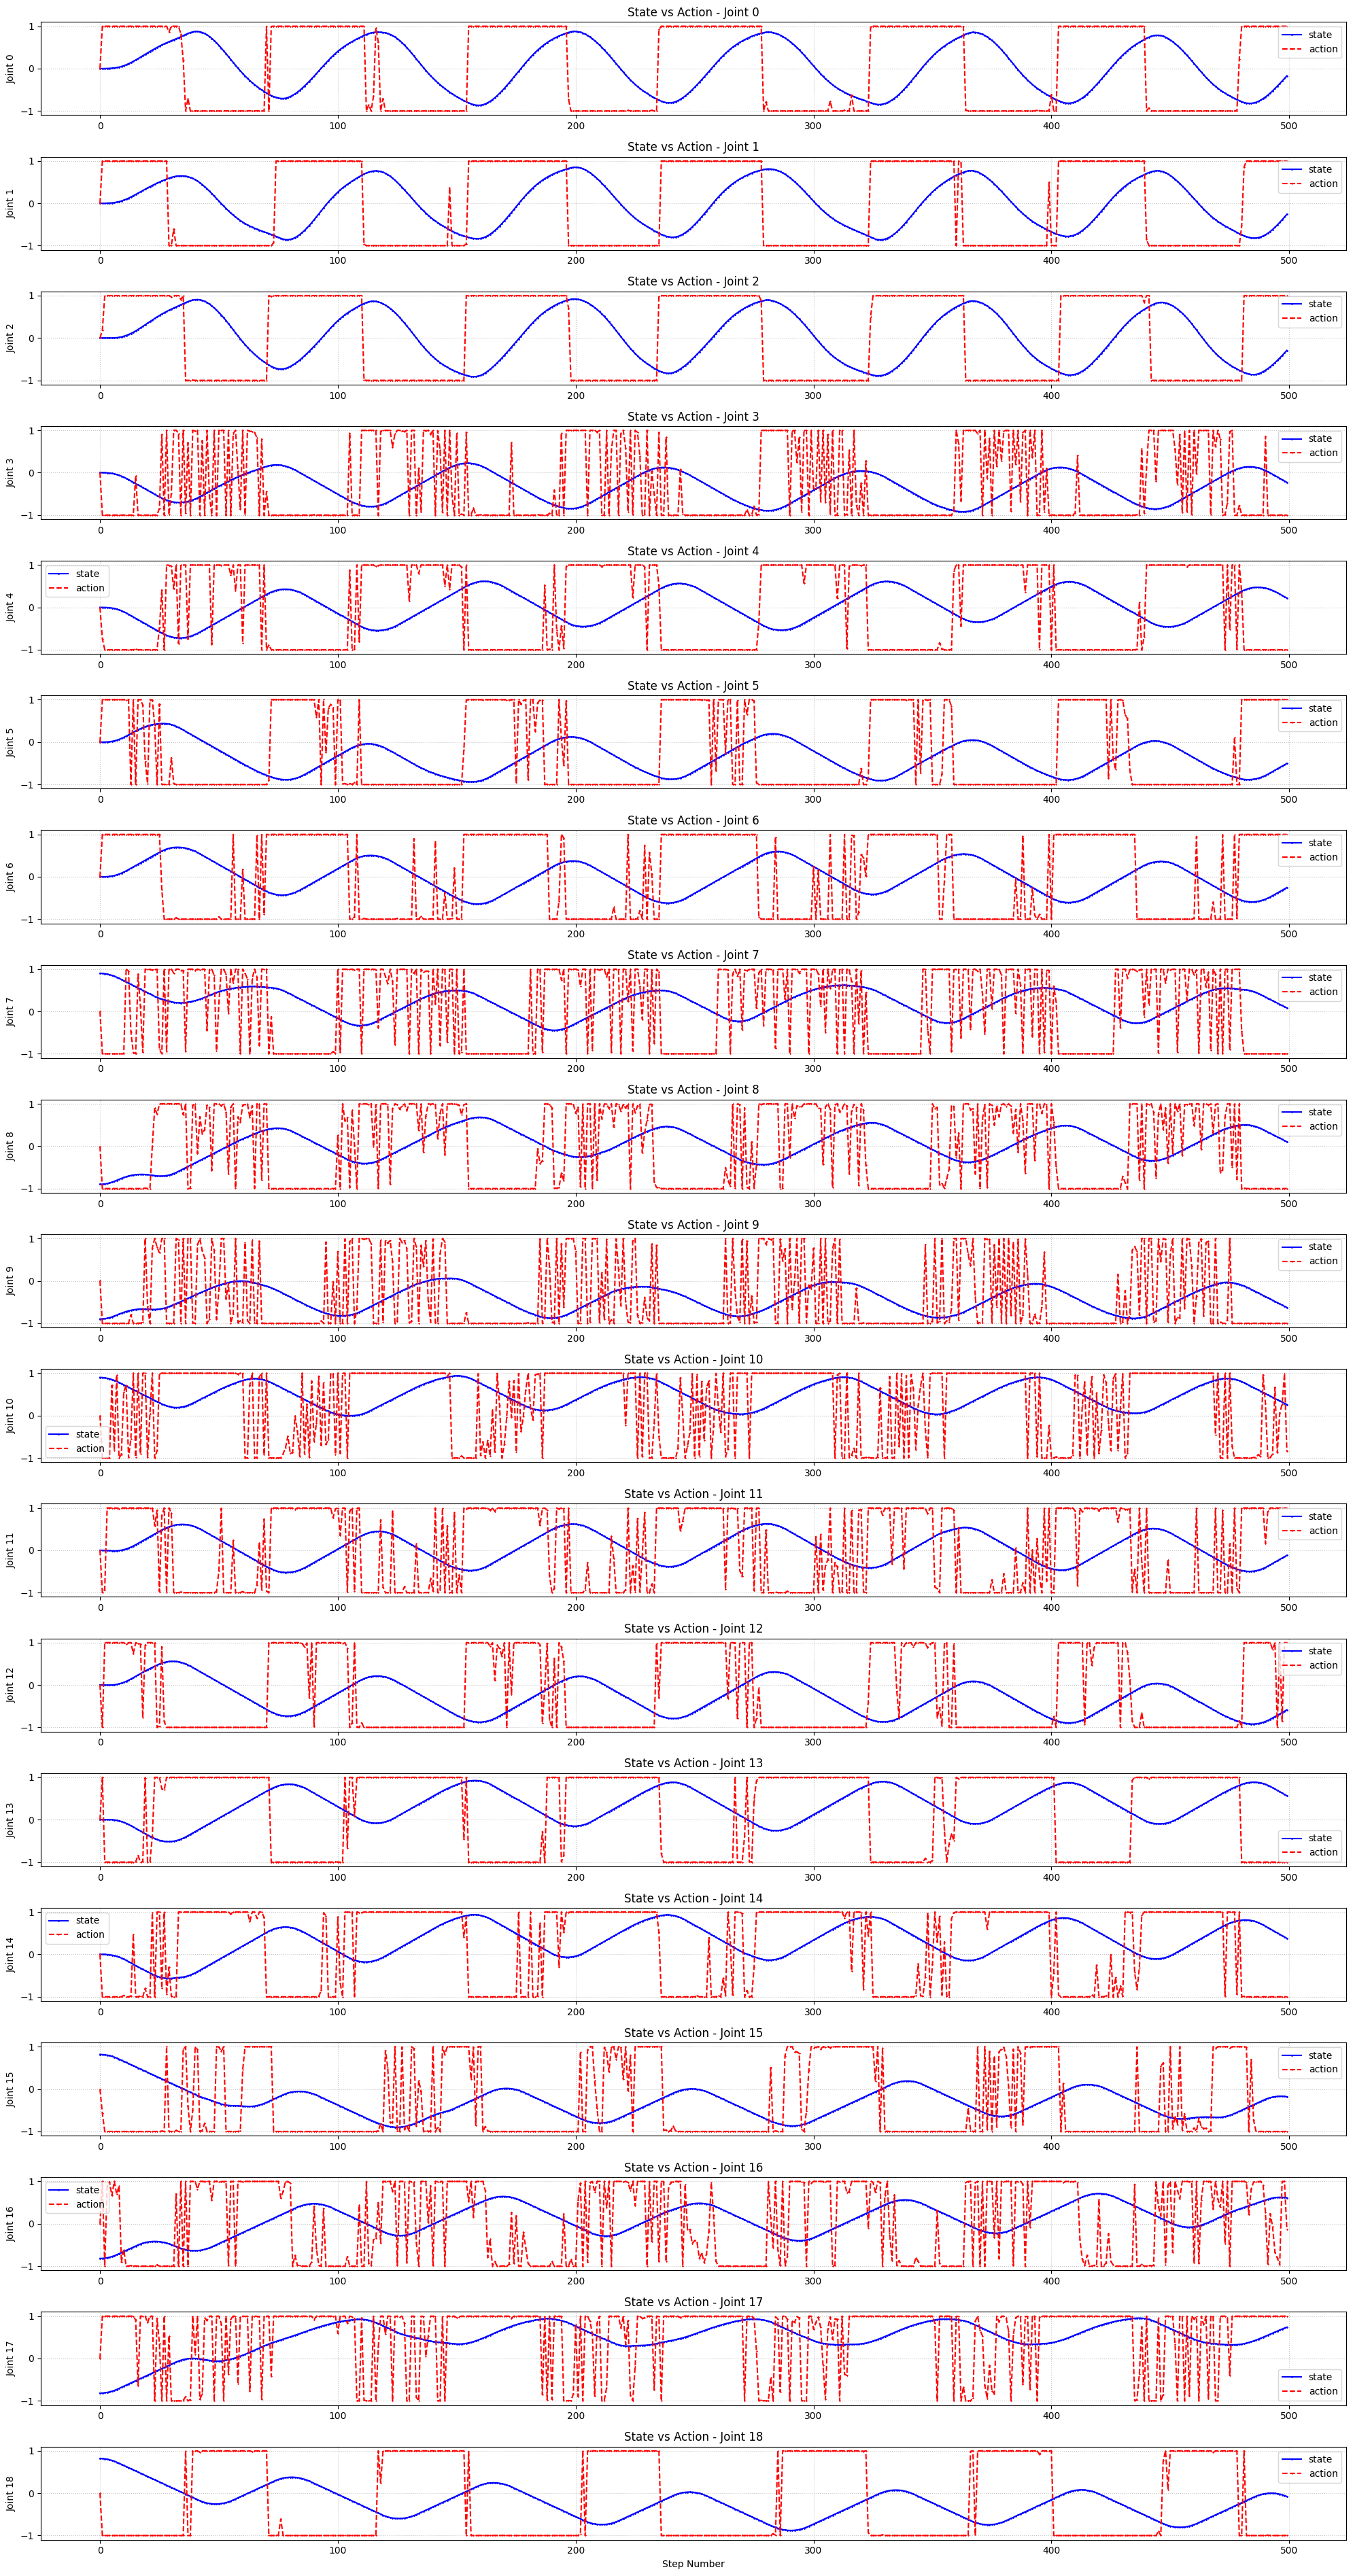

In [10]:
plot_state_action_all_joint_trajectory(states=state[:,0,:19] , actions=action[:,0,:] , num_steps=500)

#### **Compare lowpass policy action**

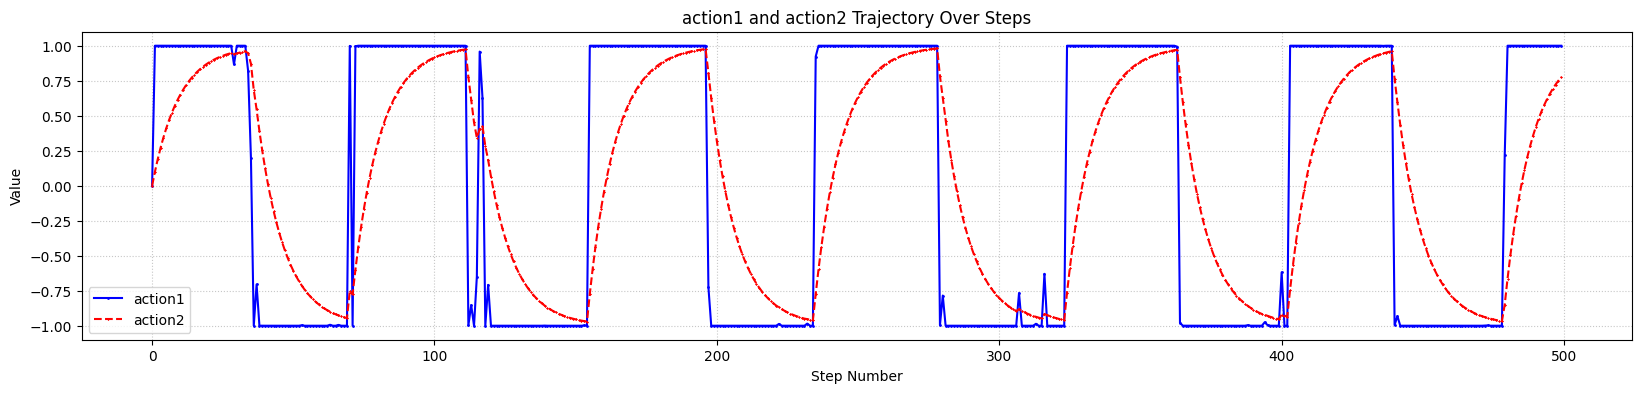

In [11]:
plot_compare_trajectory(action1=action[:,0,0] , action2=action_lowpass[:,0,0] , num_steps=500)

#### **Observe distribution of Data**

In [251]:
def hist_joint(dist1, dist2, dist1name: str, dist2name: str , n_bins=31):
    # if dist1.shape[1] != dist2.shape[1]:
    #     print("Warning: Number of joints do not match. Plotting might be inconsistent.")
    #     return

    # num_joints = dist1.shape[1]
    plt.figure(figsize=(12, 4))

    bin_edges = np.arange(n_bins)  # bins: 0–30 → for discrete bin indices 0–29

    # Subplot 1: dist1
    ax1 = plt.subplot(1, 2,  1)
    ax1.hist(dist1[:], bins=bin_edges, alpha=0.8, label=f'{dist1name}', color='blue')
    ax1.set_xlim(-0.5,  n_bins+0.5)
    ax1.set_xlabel('Bin Index')
    ax1.set_ylabel('Frequency')
    ax1.set_title(f'{dist1name} Histogram - dist1')
    ax1.legend()
    ax1.grid(True)
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax1.xaxis.set_major_locator(MultipleLocator(5))  # 👈 Tick every 5


    # Subplot 2: dist2
    ax2 = plt.subplot(1, 2,   2)
    ax2.hist(dist2[:], bins=bin_edges, alpha=0.8, label=f'{dist2name}', color='orange')
    ax2.set_xlim(-0.5, n_bins+0.5)
    ax2.set_xlabel('Bin Index')
    ax2.set_ylabel('Frequency')
    ax2.set_title(f'{dist2name} Histogram - dist2')
    ax2.legend()
    ax2.grid(True)
    ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax2.xaxis.set_major_locator(MultipleLocator(5))  # 👈 Tick every 5


    plt.tight_layout()
    plt.show()

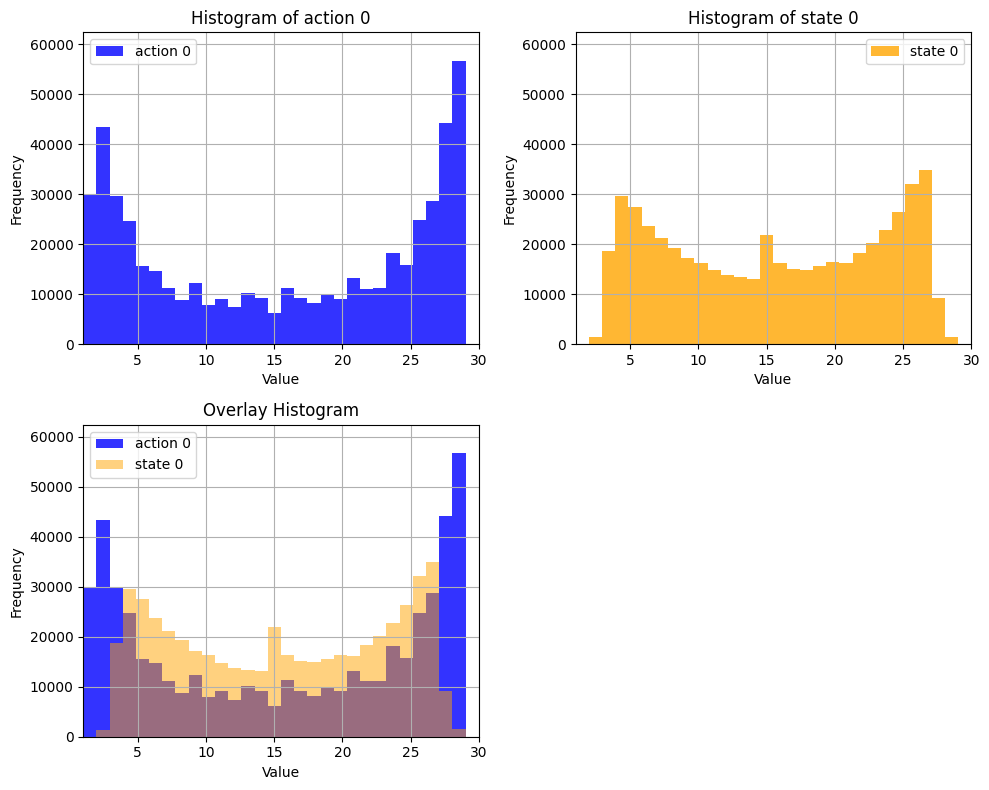

In [69]:
hist_joint(action_j0 , state_j0 , "action 0" , "state 0")

#### **Entropy Calculating**

for single variable entropy calculate follow:

$$
H(x) = -\sum_{\forall{x}} p(x) \log(p(x))
$$

In [223]:
def calculate_entropy(dist , n_bin=30):
    hist, bin_edges = np.histogram(dist, bins=n_bin)
    n_sample = len(dist)
    p_x = hist/n_sample
    p_x = p_x[p_x > 0]
    h = -sum(p_x * np.log(p_x))
    return h

In [19]:
calculate_entropy(dist=action_j0)

np.float64(3.159559438023444)

#### **Mutual Information Calculating**

In [224]:
def calculate_MI(dist1, dist2, n_bins=30):
    # Step 1: Compute joint histogram
    joint_hist, x_edges, y_edges = np.histogram2d(dist1, dist2, bins=n_bins)

    # Normalize to get joint probability distribution P(x, y)
    p_xy = joint_hist / np.sum(joint_hist)
    # Step 2: Marginal distributions P(x) and P(y)
    p_x = np.sum(p_xy, axis=1)  # sum over rows to get P(x)
    p_y = np.sum(p_xy, axis=0)  # sum over columns to get P(y)

    # Step 3: Compute mutual information
    mi = 0.0
    for i in range(n_bins):
        for j in range(n_bins):
            if p_xy[i, j] > 0 and p_x[i] > 0 and p_y[j] > 0:
                mi += p_xy[i, j] * np.log(p_xy[i, j] / (p_x[i] * p_y[j]))

    return mi

In [21]:
calculate_MI(action_j0,state_j0)

np.float64(1.3103278646078877)

## **DEMO**

#### **Load Data**

In [ ]:
fullstate = np.load("data/HEBB-FULL-STATE_seed-0_7500.npz")
state = fullstate["state"]
action = fullstate["action"]
action_lowpass = fullstate["action_lowpass"]
print("Example Dimension of state : " , state.shape)
print("Example Dimension of action : " , action.shape)


Example Dimension of state :  (7500, 1024, 64)
Example Dimension of action :  (7500, 1024, 19)


#### **Discretize**

In [ ]:
n_bins = 31
bins = np.linspace(-1, 1, n_bins)
state_bin = np.digitize(state, bins=bins)
action_bin = np.digitize(action, bins=bins)
action_lowpass_bin = np.digitize(action_lowpass, bins=bins)
print("bin : " , bins)
print(state_bin.shape)

bin :  [-1.         -0.93333333 -0.86666667 -0.8        -0.73333333 -0.66666667
 -0.6        -0.53333333 -0.46666667 -0.4        -0.33333333 -0.26666667
 -0.2        -0.13333333 -0.06666667  0.          0.06666667  0.13333333
  0.2         0.26666667  0.33333333  0.4         0.46666667  0.53333333
  0.6         0.66666667  0.73333333  0.8         0.86666667  0.93333333
  1.        ]
(7500, 1024, 64)


In [255]:
print(state_bin[:,0,0])

[16 16 16 ... 16 16 17]


In [ ]:
joint_name = ['joint0_m', 'joint0_h', 'joint0_f', 'joint1_rf', 'joint1_lf', 'joint1_rh', 'joint1_lh', 'joint2_rf', 'joint2_lf', 'joint2_rh', 'joint2_lh', 'joint3_rf', 'joint3_lf', 'joint3_rh', 'joint3_lh', 'joint4_rf', 'joint4_lf', 'joint4_rh', 'joint4_lh']

In [257]:
action_j = action_lowpass_bin
state_j = state_bin
print(action_j.shape)
print(state_j.shape)

(7500, 1024, 19)
(7500, 1024, 64)


## **Explore Joint data**

In [240]:
def hist_all_joint(dist1, dist2, dist1name: str, dist2name: str , n_bins=31):
    if dist1.shape[1] != dist2.shape[1]:
        print("Warning: Number of joints do not match. Plotting might be inconsistent.")
        return

    num_joints = dist1.shape[1]
    plt.figure(figsize=(12, 4 * num_joints))

    bin_edges = np.arange(n_bins)  # bins: 0–30 → for discrete bin indices 0–29

    for i in range(num_joints):
        # Subplot 1: dist1
        ax1 = plt.subplot(num_joints, 2, 2 * i + 1)
        ax1.hist(dist1[:, i], bins=bin_edges, alpha=0.8, label=f'{dist1name} J{i}', color='blue')
        ax1.set_xlim(-0.5,  n_bins+0.5)
        ax1.set_xlabel('Bin Index')
        ax1.set_ylabel('Frequency')
        ax1.set_title(f'{dist1name} Histogram - Joint {i}')
        ax1.legend()
        ax1.grid(True)
        ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
        ax1.xaxis.set_major_locator(MultipleLocator(5))  # 👈 Tick every 5


        # Subplot 2: dist2
        ax2 = plt.subplot(num_joints, 2, 2 * i + 2)
        ax2.hist(dist2[:, i], bins=bin_edges, alpha=0.8, label=f'{dist2name} J{i}', color='orange')
        ax2.set_xlim(-0.5, n_bins+0.5)
        ax2.set_xlabel('Bin Index')
        ax2.set_ylabel('Frequency')
        ax2.set_title(f'{dist2name} Histogram - Joint {i}')
        ax2.legend()
        ax2.grid(True)
        ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
        ax2.xaxis.set_major_locator(MultipleLocator(5))  # 👈 Tick every 5


    plt.tight_layout()
    plt.show()

#### **Observe joint distribution**

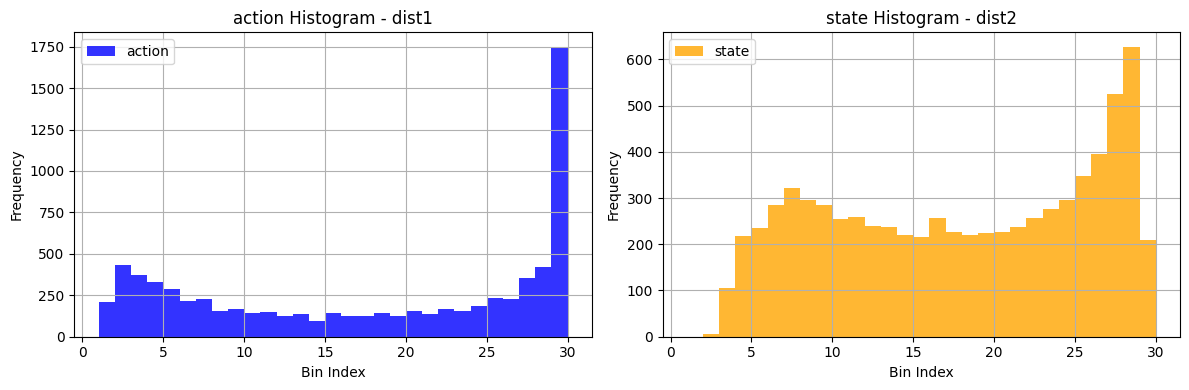

In [258]:
hist_joint(action_j[:,0,0] , state_j[:,0,0] , "action" , "state", n_bins=n_bins)

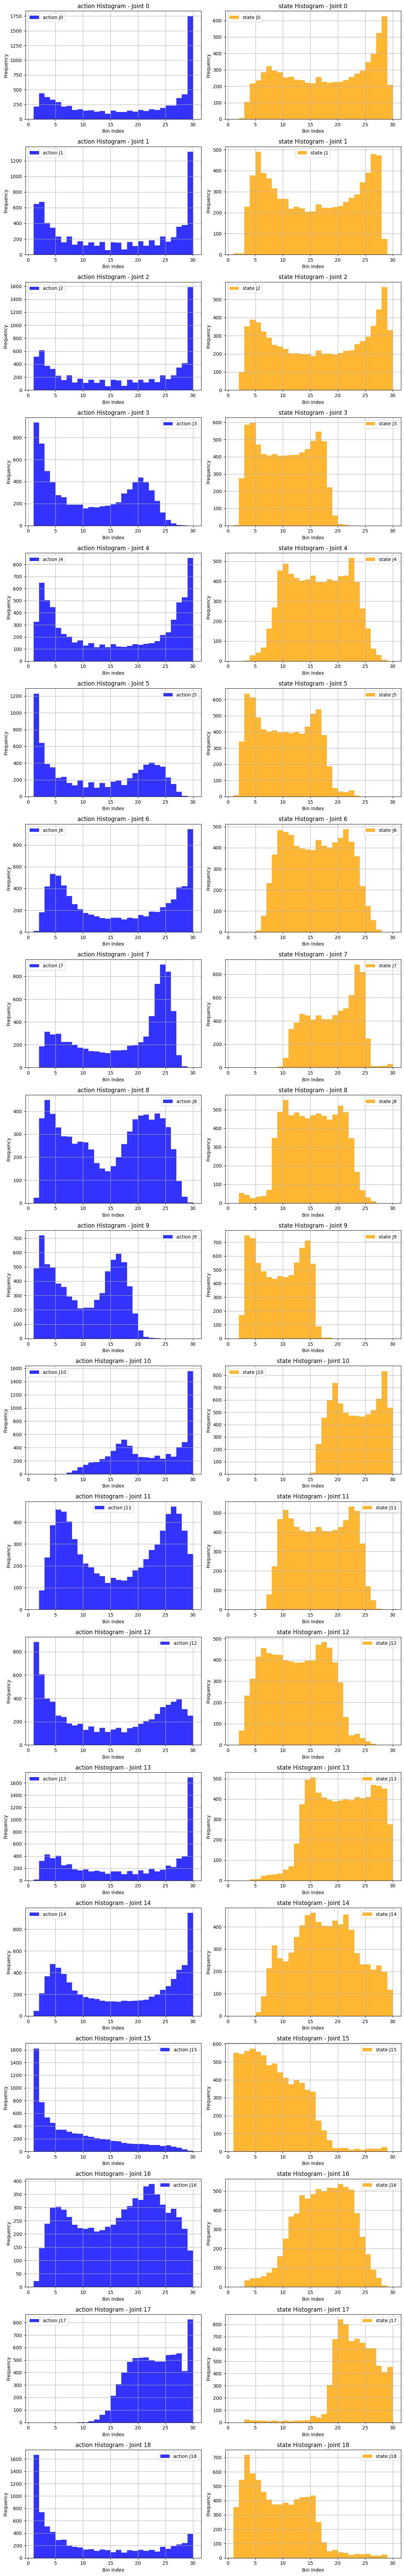

In [259]:
hist_all_joint(action_j[:,0,:] , state_j[:,0,:19] , "action" , "state")

#### **Observe overlap joint distribution**

In [260]:
def hist_overlap_all_joint(dist1, dist2, dist1name: str, dist2name: str , n_bins=31):
    if dist1.shape[1] != dist2.shape[1]:
        print("Warning: Number of joints do not match. Plotting might be inconsistent.")
        return

    num_joints = dist1.shape[1]
    plt.figure(figsize=(12, 4 * num_joints))

    bin_edges = np.arange(n_bins)  # bins: 0–30 → for discrete bin indices 0–29

    for i in range(num_joints):
        # Subplot 1: dist1
        ax1 = plt.subplot(num_joints, 2, i + 1)
        ax1.hist(dist1[:, i], bins=bin_edges, alpha=0.8, label=f'{dist1name} J{i}', color='blue')
        ax1.hist(dist2[:, i], bins=bin_edges, alpha=0.8, label=f'{dist2name} J{i}', color='orange')
        ax1.set_xlim(-0.5,  n_bins+0.5)
        ax1.set_xlabel('Bin Index')
        ax1.set_ylabel('Frequency')
        ax1.set_title(f'{dist1name} Histogram - Joint {i}')
        ax1.legend()
        ax1.grid(True)
        ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
        ax1.xaxis.set_major_locator(MultipleLocator(5))  # 👈 Tick every 5

    plt.tight_layout()
    plt.show()

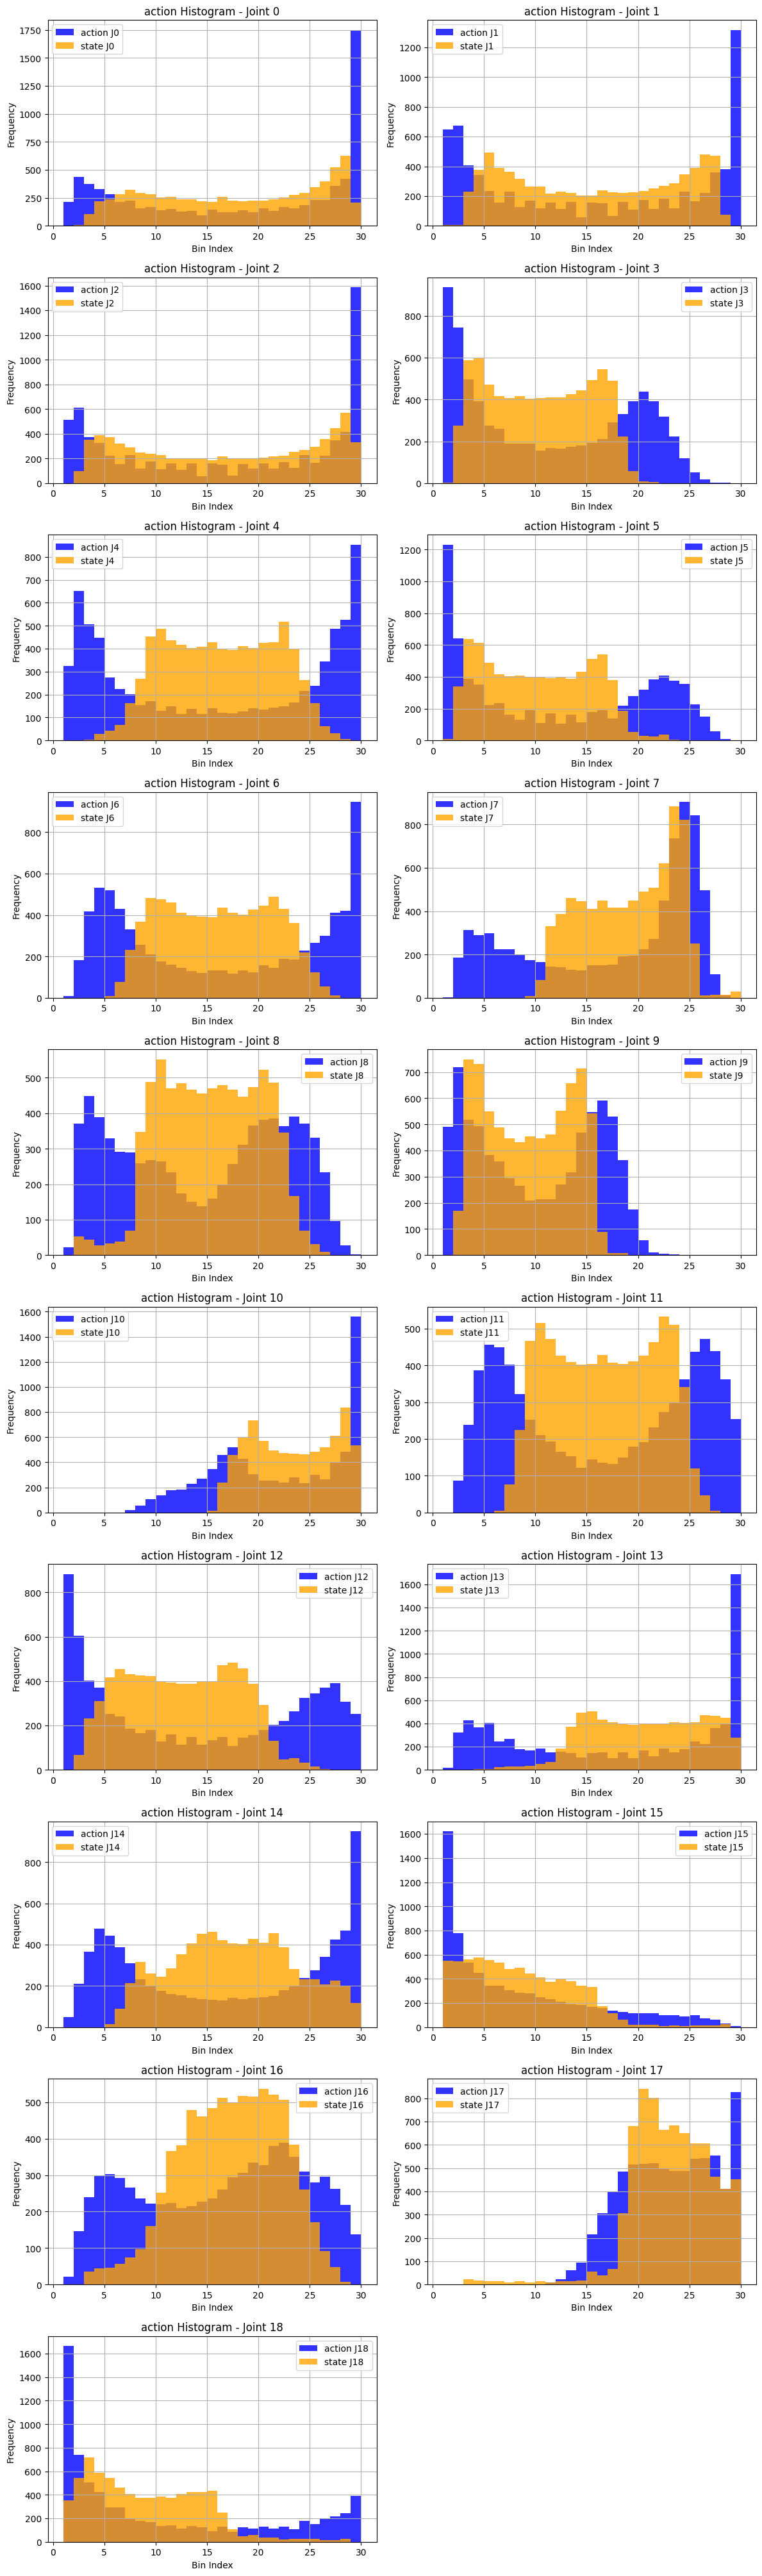

In [262]:
hist_overlap_all_joint(action_j[:,0,:19] , state_j[:,0,:19] , "action" , "state" , n_bins=n_bins)

### **Calculating Mutual information**

In [263]:
def calculate_all_MI(action_dist, state_dist, n_bins=30):
    action_space = action_dist.shape[1]
    state_space = state_dist.shape[1]

    mi_matrix = np.zeros((action_space, state_space))

    for i in range(action_space):
        for j in range(state_space):
            mi_matrix[i, j] = calculate_MI(action_dist[: , i], state_dist[: , j], n_bins)

    # Get the indices of the maximum MI value
    max_idx = np.unravel_index(np.argmax(mi_matrix), mi_matrix.shape)

    return mi_matrix, max_idx   

In [264]:
def plot_MI_heatmap(mi_array , fname):
    plt.figure(figsize=(48, 24))
    im = plt.imshow(mi_array, cmap='viridis', origin='lower')

    # Set custom tick labels
    x_ticks = np.arange(mi_array.shape[1])
    y_ticks = np.arange(mi_array.shape[0])
    plt.xticks(x_ticks, fontsize=10)
    plt.yticks(y_ticks, fontsize=10)

    # Add MI values inside each cell
    for i in range(mi_array.shape[0]):
        for j in range(mi_array.shape[1]):
            value = mi_array[i, j]
            plt.text(j, i, f"{value:.2f}", ha='center', va='center',
                     fontsize=12,
                     color='white' if value > mi_array.max()/2 else 'black')

    # Axis labels and title with custom size
    plt.xlabel('State Index', fontsize=15)
    plt.ylabel('Action Index', fontsize=15)
    plt.title('Mutual Information Heatmap', fontsize=24)


    plt.tight_layout()
    if fname is not None:
        plt.savefig(fname)
    plt.show()


In [267]:
mi,_ = calculate_all_MI(action_j[:,0,:],state_j[:,0,:])

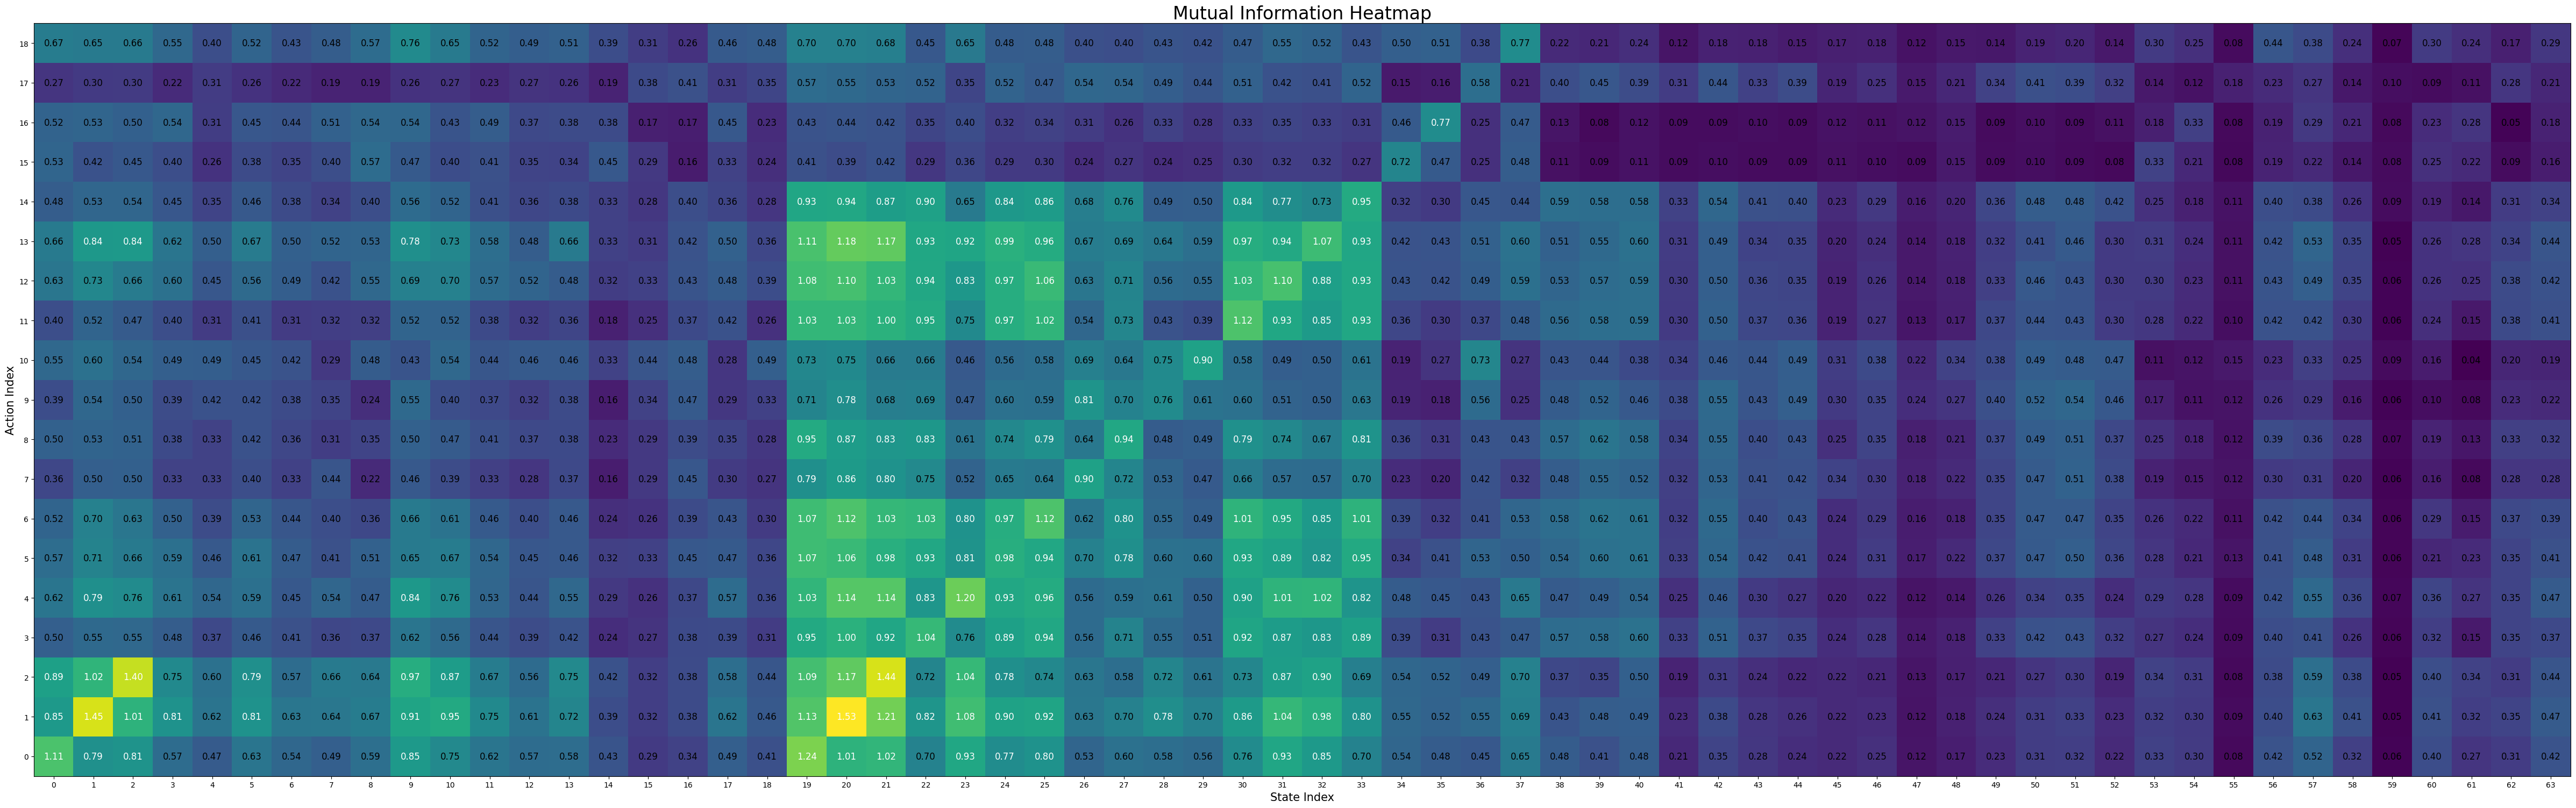

In [268]:
plot_MI_heatmap(mi,"test")

#### **Observe most informative between joint action and joint_vel state**

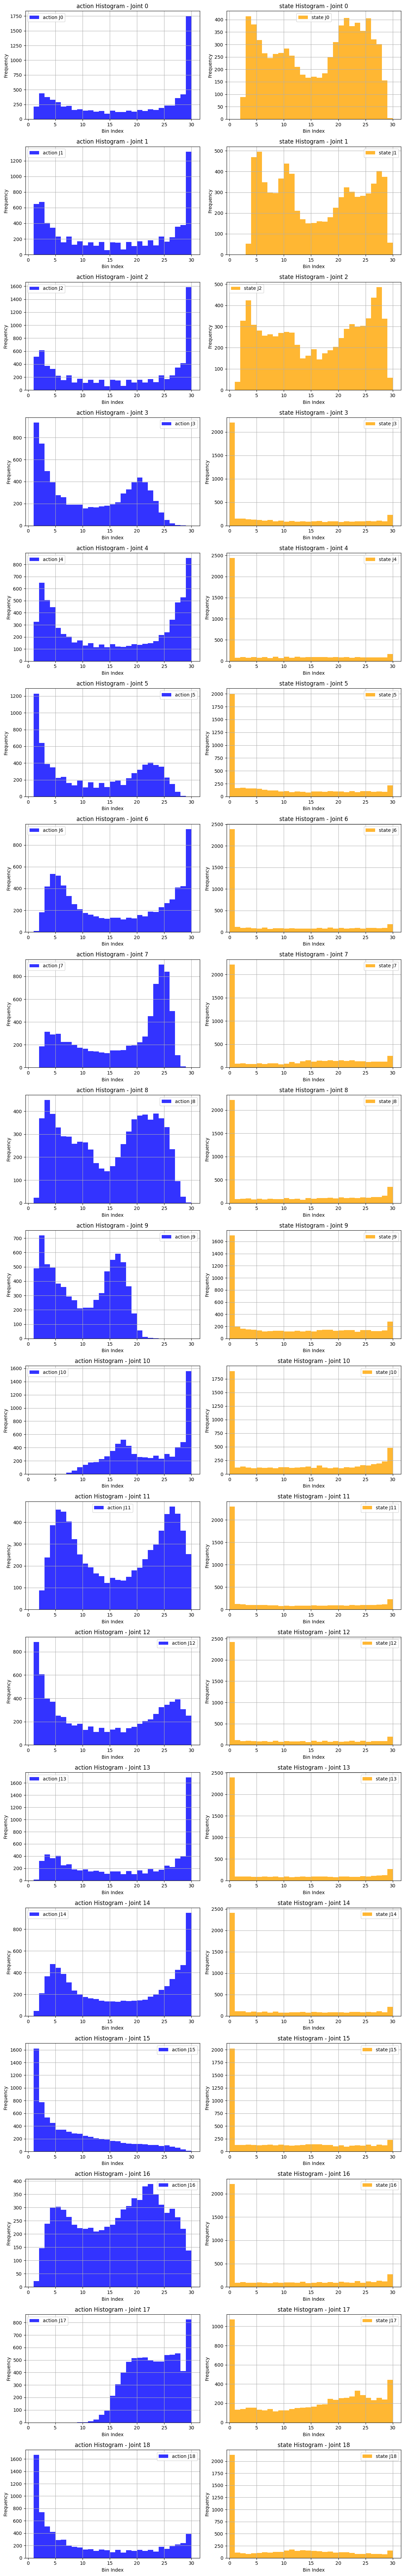

In [272]:
hist_all_joint(action_j[:,0,:] , state_j[:,0,19:38] , "action" , "state", n_bins=n_bins)

**Overlapping joint action & joint vel**

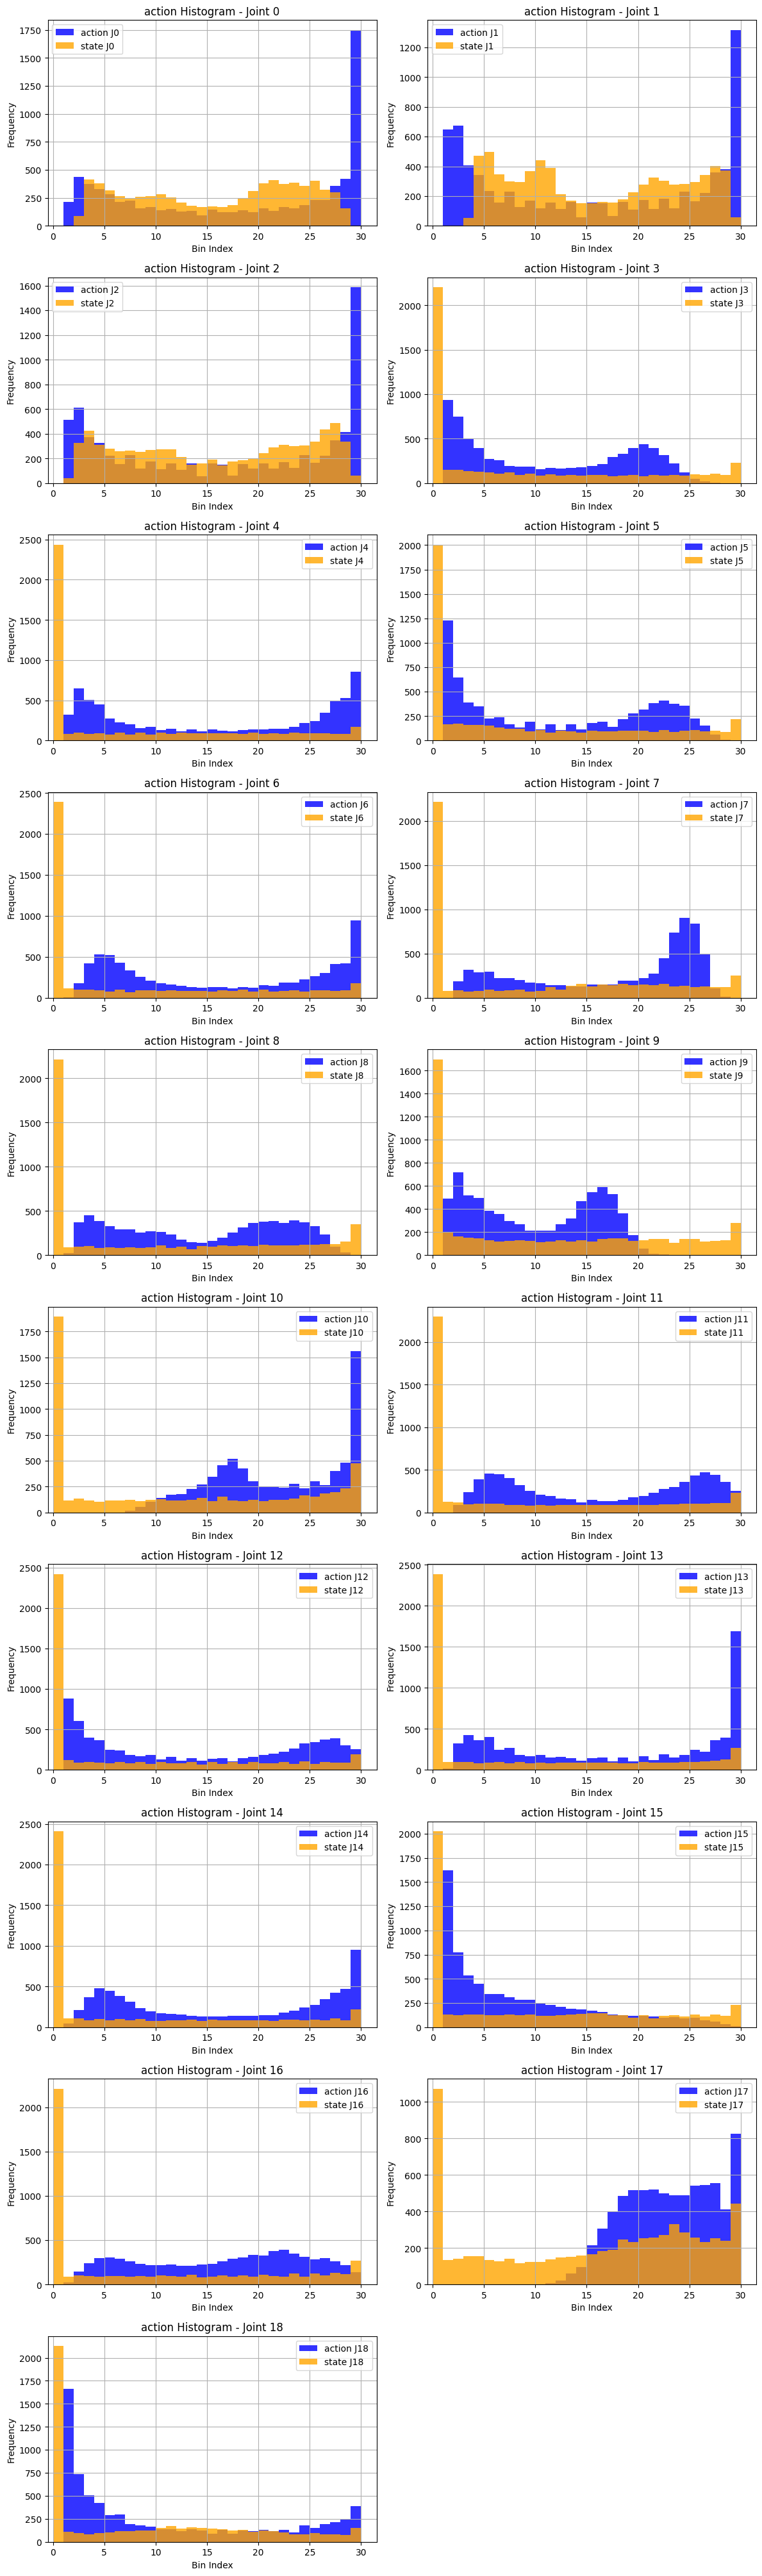

: 

In [ ]:
hist_overlap_all_joint(action_j[:,0,:] , state_j[:,0,19:38] , "action" , "state", n_bins=n_bins)